In [65]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from os.path import join
from scipy.ndimage.morphology import binary_dilation
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

In [111]:
# !pip install anomalib
!pip install open3d   

  Obtaining dependency information for open3d from https://files.pythonhosted.org/packages/79/89/2c02b9b9559331ec456c16d43ebde5e48a914299b40f272faba7acb347ab/open3d-0.18.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for dash>=2.6.0 from https://files.pythonhosted.org/packages/63/22/bc266b167111e70a2da940e78b78d22fea5b1ee32b512ed0789bd6cc2a9f/dash-2.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for configargparse from https://files.pythonhosted.org/packages/6f/b3/b4ac838711fd74a2b4e6f746703cf9dd2cf5462d17dac07e349234e21b97/ConfigArgParse-1.7-py3-none-any.whl.metadata
  Obtaining dependency information for Flask<3.1,>=1.0.4 from https://files.pythonhosted.org/packages/61/80/ffe1da13ad9300f87c93af113edd0638c75138c42a0994becfacac078c06/flask-3.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for plotly>=5.0.0 from https://files.pythonhosted.org/packages/0b/f8/b65cdd2be32e442c4efe7b672f73c90b05eab5a7f3f4115efe181d432c60/plotly-5.22

In [67]:
from anomalib import data

In [68]:
dataset= data.mvtec_3d.MVTec3DDataset('segmentation', root='./DATASETS/Tayre_3D/tire/', category='calibration', transform=None, split=None)

In [82]:
datamodule = data.MVTec(root='./DATASETS/Tayre_3D/tire/', category='calibration', image_size=256)

In [95]:
datamodule.train_data.setup()

AssertionError: Mismatch between anomalous images and ground truth masks. Make sure the mask files in 'ground_truth'                 folder follow the same naming convention as the anomalous images in the dataset (e.g. image:                 '000.png', mask: '000.png' or '000_mask.png').

In [90]:
train_data = datamodule.train_dataloader()

RuntimeError: Dataset is not setup yet. Call setup() first.

In [89]:
train_data.

<bound method AnomalibDataModule.train_dataloader of <anomalib.data.mvtec.MVTec object at 0x0000016524E87040>>

In [87]:
for i in datamodule.train_dataloader:
    print(i)

TypeError: 'method' object is not iterable

In [83]:
for i in datamodule:
    print(i)

TypeError: 'MVTec' object is not iterable

In [69]:
dataset.setup()

In [78]:
dataset.samples

,path,split,label,type,file_name,image_path,depth_path,label_index,mask_path
0,DATASETS\Tayre_3D\tire\calibration,test,combined,rgb,000.png,DATASETS\Tayre_3D\tire\calibration/test/combin...,DATASETS\Tayre_3D\tire\calibration/test/combin...,1,DATASETS\Tayre_3D\tire\calibration/test/combin...
1,DATASETS\Tayre_3D\tire\calibration,test,combined,rgb,001.png,DATASETS\Tayre_3D\tire\calibration/test/combin...,DATASETS\Tayre_3D\tire\calibration/test/combin...,1,DATASETS\Tayre_3D\tire\calibration/test/combin...
2,DATASETS\Tayre_3D\tire\calibration,test,combined,rgb,002.png,DATASETS\Tayre_3D\tire\calibration/test/combin...,DATASETS\Tayre_3D\tire\calibration/test/combin...,1,DATASETS\Tayre_3D\tire\calibration/test/combin...
3,DATASETS\Tayre_3D\tire\calibration,test,combined,rgb,003.png,DATASETS\Tayre_3D\tire\calibration/test/combin...,DATASETS\Tayre_3D\tire\calibration/test/combin...,1,DATASETS\Tayre_3D\tire\calibration/test/combin...
4,DATASETS\Tayre_3D\tire\calibration,test,combined,rgb,004.png,DATASETS\Tayre_3D\tire\calibration/test/combin...,DATASETS\Tayre_3D\tire\calibration/test/combin...,1,DATASETS\Tayre_3D\tire\calibration/test/combin...
...,...,...,...,...,...,...,...,...,...
346,DATASETS\Tayre_3D\tire\calibration,validation,good,rgb,024.png,DATASETS\Tayre_3D\tire\calibration/validation/...,DATASETS\Tayre_3D\tire\calibration/validation/...,0,nan
347,DATASETS\Tayre_3D\tire\calibration,validation,good,rgb,025.png,DATASETS\Tayre_3D\tire\calibration/validation/...,DATASETS\Tayre_3D\tire\calibration/validation/...,0,nan
348,DATASETS\Tayre_3D\tire\calibration,validation,good,rgb,026.png,DATASETS\Tayre_3D\tire\calibration/validation/...,DATASETS\Tayre_3D\tire\calibration/validation/...,0,nan
349,DATASETS\Tayre_3D\tire\calibration,validation,good,rgb,027.png,DATASETS\Tayre_3D\tire\calibration/validation/...,DATASETS\Tayre_3D\tire\calibration/validation/...,0,nan


In [77]:
dataset.

True

In [28]:
from anomalib.data.depth.mvtec_3d import MVTec3DDataset

ModuleNotFoundError: No module named 'anomalib.data.depth'

In [ ]:
dataet = MVTec

In [25]:
Mvtec = anomalib.data.depth.mvtec_3d.MVTec3DDataset(task, root='./datasets/MVTec3D', category='bagel', transform=None, split=None)

AttributeError: module 'anomalib.data' has no attribute 'depth'

In [2]:
import config as c

my_experiment


In [3]:
def train_dataset(train_function, get_mask=False):
    all_classes = [d for d in os.listdir(c.dataset_dir) if os.path.isdir(join(c.dataset_dir, d))]
    max_scores = list()
    mean_scores = list()
    for i_c, cn in enumerate(all_classes):
        c.class_name = cn
        print('\n\nTrain class ' + c.class_name)
        train_set, test_set = load_datasets(get_mask=get_mask)
        train_loader, test_loader = make_dataloaders(train_set, test_set)
        mean_sc, max_sc = train_function(train_loader, test_loader)
        mean_scores.append(mean_sc)
        max_scores.append(max_sc)
    last_mean = np.mean([s.last_score for s in mean_scores])
    last_max = np.mean([s.last_score for s in max_scores])
    best_mean = np.mean([s.best_score for s in mean_scores])
    best_max = np.mean([s.best_score for s in max_scores])
    print('\nAUROC % after last epoch\n\tmean over maps: {:.2f} \t max over maps: {:.2f}'.format(last_mean, last_max))
    print('best AUROC %\n\tmean over maps: {:.2f} \t max over maps: {:.2f}'.format(best_mean, best_max))


def dilation(map, size):
    map = t2np(map)
    kernel = np.ones([size, size])
    for i in range(len(map)):
        map[i, 0] = binary_dilation(map[i, 0], kernel)
    map = torch.FloatTensor(map).to(c.device)
    return map


def t2np(tensor):
    '''pytorch tensor -> numpy array'''
    return tensor.cpu().data.numpy() if tensor is not None else None


def flat(tensor):
    return tensor.reshape(tensor.shape[0], -1)


def to_device(tensors, device=c.device):
    return [t.to(device) for t in tensors]


def get_st_loss(target, output, mask=None, per_sample=False, per_pixel=False):
    if not c.training_mask:
        mask = 0 * mask + 1

    loss_per_pixel = torch.mean(mask * (target - output) ** 2, dim=1)
    if per_pixel:
        return loss_per_pixel

    loss_per_sample = torch.mean(loss_per_pixel, dim=(-1, -2))
    if per_sample:
        return loss_per_sample
    return loss_per_sample.mean()


def get_nf_loss(z, jac, mask=None, per_sample=False, per_pixel=False):
    if not c.training_mask:
        mask = 0 * mask + 1
    loss_per_pixel = (0.5 * torch.sum(mask * z ** 2, dim=1) - jac * mask[:, 0])
    if per_pixel:
        return loss_per_pixel
    loss_per_sample = torch.mean(loss_per_pixel, dim=(-1, -2))
    if per_sample:
        return loss_per_sample
    return loss_per_sample.mean()


def load_datasets(get_mask=True, get_features=c.pre_extracted):
    trainset = DefectDataset(set='train', get_mask=False, get_features=get_features)
    testset = DefectDataset(set='test', get_mask=get_mask, get_features=get_features)
    return trainset, testset


def load_img_datasets(dataset_dir, class_name):
    '''
    Expected folder/file format to find anomalies of class <class_name> from dataset location <dataset_dir>:

    If 3D data is available (as for MVTec3D):

        train data:

            RGB data:
                dataset_dir/class_name/train/good/rgb/any_filename.png
                dataset_dir/class_name/train/good/rgb/another_filename.tif
                [...]

            3D data:
                dataset_dir/class_name/train/good/xyz/abc123.tiff
                dataset_dir/class_name/train/good/xyz/def1337.tiff
                [...]

        test data:


            'normal data' = non-anomalies

                see 'train data' and replace 'train' with 'test'

            anomalies - assume there is an anomaly classes 'crack'

                RGB data:
                    dataset_dir/class_name/test/crack/rgb/dat_crack_damn.png
                    dataset_dir/class_name/test/crack/rgb/let_it_crack.png
                    dataset_dir/class_name/test/crack/rgb/writing_docs_is_fun.png
                    [...]

                3D data:
                    dataset_dir/class_name/test/curved/xyz/wont_make_a_difference_if_you_put_all_anomalies_in_one_class.png
                    dataset_dir/class_name/test/curved/xyz/but_this_code_is_practicable_for_the_mvtec_dataset.png
                    [...]

    else:

        train data:

                dataset_dir/class_name/train/good/any_filename.png
                dataset_dir/class_name/train/good/another_filename.tif
                dataset_dir/class_name/train/good/xyz.png
                [...]

        test data:

            'normal data' = non-anomalies

                dataset_dir/class_name/test/good/name_the_file_as_you_like_as_long_as_there_is_an_image_extension.webp
                dataset_dir/class_name/test/good/did_you_know_the_image_extension_webp?.png
                dataset_dir/class_name/test/good/did_you_know_that_filenames_may_contain_question_marks????.png
                dataset_dir/class_name/test/good/dont_know_how_it_is_with_windows.png
                dataset_dir/class_name/test/good/just_dont_use_windows_for_this.png
                [...]

            anomalies - assume there are anomaly classes 'crack' and 'curved'

                dataset_dir/class_name/test/crack/dat_crack_damn.png
                dataset_dir/class_name/test/crack/let_it_crack.png
                dataset_dir/class_name/test/crack/writing_docs_is_fun.png
                [...]

                dataset_dir/class_name/test/curved/wont_make_a_difference_if_you_put_all_anomalies_in_one_class.png
                dataset_dir/class_name/test/curved/but_this_code_is_practicable_for_the_mvtec_dataset.png
                [...]
    '''

    def target_transform(target):
        return class_perm[target]

    data_dir_train = os.path.join(dataset_dir, class_name, 'train')
    data_dir_test = os.path.join(dataset_dir, class_name, 'test')
    classes = os.listdir(data_dir_test)
    if 'good' not in classes:
        raise RuntimeError(
            'There should exist a subdirectory "good". Read the doc of this function for further information.')
    classes.sort()
    class_perm = list()
    class_idx = 1
    for cl in classes:
        if cl == 'good':
            class_perm.append(0)
        else:
            class_perm.append(class_idx)
            class_idx += 1

    image_transforms = transforms.Compose([transforms.Resize(c.img_size), transforms.ToTensor(),
                                           transforms.Normalize(c.norm_mean, c.norm_std)])
    valid_img = (lambda x: 'rgb' in x and x.endswith('png')) if c.use_3D_dataset else None
    trainset = ImageFolder(data_dir_train, transform=image_transforms, is_valid_file=valid_img)
    testset = ImageFolder(data_dir_test, transform=image_transforms, target_transform=target_transform,
                          is_valid_file=valid_img)
    return trainset, testset


def make_dataloaders(trainset, testset, shuffle_train=True, drop_last=True):
    trainloader = torch.utils.data.DataLoader(trainset, pin_memory=True, batch_size=c.batch_size, shuffle=shuffle_train,
                                              drop_last=drop_last)
    testloader = torch.utils.data.DataLoader(testset, pin_memory=True, batch_size=c.eval_batch_size, shuffle=False,
                                             drop_last=False)
    return trainloader, testloader


def downsampling(x, size, to_tensor=False, bin=True):
    if to_tensor:
        x = torch.FloatTensor(x).to(c.device)
    down = F.interpolate(x, size=size, mode='bilinear', align_corners=False)
    if bin:
        down[down > 0] = 1
    return down


class DefectDataset(Dataset):
    def __init__(self, set='train', get_mask=True, get_features=True):
        super(DefectDataset, self).__init__()
        self.set = set
        self.labels = list()
        self.masks = list()
        self.images = list()
        self.depths = list()
        self.class_names = ['good']
        self.get_mask = get_mask
        self.get_features = get_features
        self.image_transforms = transforms.Compose([transforms.Resize(c.img_size), transforms.ToTensor(),
                                                    transforms.Normalize(c.norm_mean, c.norm_std)])
        root = join(c.dataset_dir, c.class_name)
        set_dir = os.path.join(root, set)
        subclass = os.listdir(set_dir)
        subclass.sort()
        class_counter = 1
        for sc in subclass:
            if sc == 'good':
                label = 0
            else:
                label = class_counter
                self.class_names.append(sc)
                class_counter += 1
            sub_dir = os.path.join(set_dir, sc)
            img_dir = join(sub_dir, 'rgb') if c.use_3D_dataset else sub_dir
            img_paths = os.listdir(img_dir)
            img_paths.sort()
            for p in img_paths:
                i_path = os.path.join(img_dir, p)
                if not i_path.lower().endswith(
                        ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')):
                    continue
                self.images.append(i_path)
                self.labels.append(label)
                if self.set == 'test' and self.get_mask:
                    extension = '_mask' if sc != 'good' else ''
                    mask_path = i_path.replace('rgb', 'gt') if c.use_3D_dataset else os.path.join(root, 'ground_truth',
                                                                                                  sc,
                                                                                                  p[
                                                                                                  :-4] + extension + p[
                                                                                                                     -4:])
                    self.masks.append(mask_path)
                if c.use_3D_dataset:
                    self.depths.append(i_path.replace('rgb', 'z')[:-4] + '.npy')

        if get_features:
            self.features = np.load(os.path.join(c.feature_dir, c.class_name, set + '.npy'))

        self.img_mean = torch.FloatTensor(c.norm_mean)[:, None, None]
        self.img_std = torch.FloatTensor(c.norm_std)[:, None, None]

    def __len__(self):
        return len(self.images)

    def transform(self, x, img_len, binary=False):
        x = x.copy()
        x = torch.FloatTensor(x)
        if len(x.shape) == 2:
            x = x[None, None]
            channels = 1
        elif len(x.shape) == 3:
            x = x.permute(2, 0, 1)[None]
            channels = x.shape[1]
        else:
            raise Exception(f'invalid dimensions of x:{x.shape}')

        x = downsampling(x, (img_len, img_len), bin=binary)
        x = x.reshape(channels, img_len, img_len)
        return x

    def get_3D(self, index):
        sample = np.load(self.depths[index])
        depth = sample[:, :, 0]
        fg = sample[:, :, -1]
        mean_fg = np.sum(fg * depth) / np.sum(fg)
        depth = fg * depth + (1 - fg) * mean_fg
        depth = (depth - mean_fg) * 100
        return depth, fg

    def __getitem__(self, index):
        if c.use_3D_dataset:
            depth, fg = self.get_3D(index)
            depth = self.transform(depth, c.depth_len, binary=False)
            fg = self.transform(fg, c.depth_len, binary=True)
        else:
            depth = torch.zeros([1, c.depth_len, c.depth_len])
            fg = torch.ones([1, c.depth_len, c.depth_len])

        if self.set == 'test' or not self.get_features:
            with open(self.images[index], 'rb') as f:
                img = Image.open(f).convert('RGB')
            img = self.image_transforms(img)
        else:
            img = 0

        label = self.labels[index]
        feat = self.features[index] if self.get_features else 0

        ret = [depth, fg, label, img, feat]

        if self.set == 'test' and self.get_mask:
            with open(self.masks[index], 'rb') as f:
                mask = Image.open(f)
                mask = self.transform(np.array(mask), c.depth_len, binary=True)[:1]
                mask[mask > 0] = 1
                ret.append(mask)
        return ret


class Score_Observer:
    '''Keeps an eye on the current and highest score so far'''

    def __init__(self, name, percentage=True):
        self.name = name
        self.max_epoch = 0
        self.best_score = None
        self.last_score = None
        self.percentage = percentage

    def update(self, score, epoch, print_score=False):
        if self.percentage:
            score = score * 100
        self.last_score = score
        improved = False
        if epoch == 0 or score > self.best_score:
            self.best_score = score
            improved = True
        if print_score:
            self.print_score()
        return improved

    def print_score(self):
        print('{:s}: \t last: {:.2f} \t best: {:.2f}'.format(self.name, self.last_score, self.best_score))

In [6]:
all_classes

['combined', 'contamination', 'cut', 'good', 'hole']

In [5]:
all_classes = [d for d in os.listdir(c.dataset_dir) if os.path.isdir(join(c.dataset_dir, d))]
max_scores = list()
mean_scores = list()
for i_c, cn in enumerate(all_classes):
    c.class_name = cn
    print('\n\nTrain class ' + c.class_name)
    train_set, test_set = load_datasets(get_mask=True)
    train_loader, test_loader = make_dataloaders(train_set, test_set)



Train class combined


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'DATASETS/Tayre_3D/tire/calibration/test\\combined\\train'

Shape of the image data: (29, 800, 600, 3)


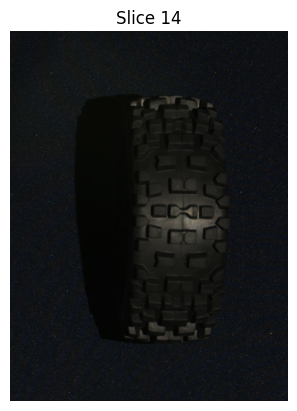

In [110]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the stack of 2D RGB images
image_folder = r"C:\Users\Admin\Documents\Anomaly Detection\AnoDDPM\DATASETS\Tayre_3D\tire\calibration\validation\good/rgb" # Replace with your folder path
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png') or f.endswith('.jpg')])

images = []
for file in image_files:
    img = imageio.imread(os.path.join(image_folder, file))
    images.append(img)

# Convert the list of images to a 3D numpy array
img_data = np.stack(images, axis=0)

# Check the shape of the image data
print(f"Shape of the image data: {img_data.shape}")  # Should be (num_slices, height, width, channels)

# Visualize a slice of the 3D RGB image
slice_index = img_data.shape[0] // 2  # Select the middle slice
plt.imshow(img_data[slice_index])
plt.title(f'Slice {slice_index}')
plt.axis('off')
plt.show()


In [112]:
import numpy as np
import open3d as o3d

if __name__ == "__main__":

    print("Testing camera in open3d ...")
    intrinsic = o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
    print(intrinsic.intrinsic_matrix)
    print(o3d.camera.PinholeCameraIntrinsic())
    x = o3d.camera.PinholeCameraIntrinsic(640, 480, 525, 525, 320, 240)
    print(x)
    print(x.intrinsic_matrix)
    o3d.io.write_pinhole_camera_intrinsic("test.json", x)
    y = o3d.io.read_pinhole_camera_intrinsic("test.json")
    print(y)
    print(np.asarray(y.intrinsic_matrix))

    print("Read a trajectory and combine all the RGB-D images.")
    pcds = []
    redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
    trajectory = o3d.io.read_pinhole_camera_trajectory(
        redwood_rgbd.trajectory_log_path)
    o3d.io.write_pinhole_camera_trajectory("test.json", trajectory)
    print(trajectory)
    print(trajectory.parameters[0].extrinsic)
    print(np.asarray(trajectory.parameters[0].extrinsic))
    for i in range(5):
        im1 = o3d.io.read_image(redwood_rgbd.depth_paths[i])
        im2 = o3d.io.read_image(redwood_rgbd.color_paths[i])
        im = o3d.geometry.RGBDImage.create_from_color_and_depth(
            im2, im1, 1000.0, 5.0, False)
        pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
            im, trajectory.parameters[i].intrinsic,
            trajectory.parameters[i].extrinsic)
        pcds.append(pcd)
    o3d.visualization.draw_geometries(pcds)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Testing camera in open3d ...
[[525.    0.  319.5]
 [  0.  525.  239.5]
 [  0.    0.    1. ]]
PinholeCameraIntrinsic with width = -1 and height = -1.
Access intrinsics with intrinsic_matrix.
PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.
[[525.   0. 320.]
 [  0. 525. 240.]
 [  0.   0.   1.]]
PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.
[[525.   0. 320.]
 [  0. 525. 240.]
 [  0.   0.   1.]]
Read a trajectory and combine all the RGB-D images.
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220301-data/SampleRedwoodRGBDImages.zip
[Open3D INFO] Downloaded to C:\Users\Admin/open3d_data/download/SampleRedwoodRGBDImages/SampleRedwoodRGBDImages.zip
[Open3D INFO] Created directory C:\